In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
data_fake=pd.read_csv('fake.csv')
data_true=pd.read_csv('true.csv')

In [3]:
data_fake.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
data_true.tail()


,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [9]:
data_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [11]:
data_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [13]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [15]:
data_true.tail()


,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [17]:
data_fake["class"]=0
data_true['class']=1

In [19]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [21]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis = 0, inplace = True)

    
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis = 0, inplace = True)
    
    

In [23]:
data_fake.shape, data_true.shape


((23471, 5), (21407, 5))

In [25]:
data_fake_manual_testing.head(10)


,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [27]:
data_true_manual_testing.head(10)


,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [29]:
data_merge=pd.concat([data_fake, data_true], axis = 0)
data_merge.sample(10)

,title,text,subject,date,class
20654,OVER 100 COLLEGES WILL HOLD SEPARATE GRADUATIO...,A Bi-Product Of Obama s Divided America The LG...,left-news,"Apr 29, 2016",0
16404,RADICAL ANTI-GUN MUSLIM State Senator Who Was ...,"On October 20, 2015, radical Muslim State sena...",Government News,"Sep 16, 2016",0
5932,These Two Former Republicans Are On The Cusp ...,All the political buzz right now is whether or...,News,"June 10, 2016",0
15075,North Korea says Trump begged for a war during...,SEOUL (Reuters) - North Korea said on Saturday...,worldnews,"November 11, 2017",1
9908,LOL! New York Times Publishes Lengthy Article ...,While Facebook has hired an entire team of emp...,politics,"Sep 14, 2017",0
15216,[VIDEO] FLASHBACK TO THE LIE ABOUT THE VIDEO O...,"#NeverForget Sean Smith, Tyrone Woods, Chris D...",politics,"Sep 11, 2015",0
4547,Racist Whacko Threatens Construction Crew Wit...,A racist Georgia man went completely off the d...,News,"September 20, 2016",0
15343,British aid minister resigns over undisclosed ...,LONDON (Reuters) - British aid minister Priti ...,worldnews,"November 8, 2017",1
2819,Conway: Mexico Won’t Pay For The Wall Because...,"Donald Trump s wall is a stupid, money-wasting...",News,"January 27, 2017",0
19970,Macron enacts public ethics law with a whiff o...,PARIS (Reuters) - President Emmanuel Macron in...,worldnews,"September 15, 2017",1


In [31]:
data_merge.columns


Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [33]:
fake_subject_stats = data_merge[data_merge['class'] == 0]['subject'].value_counts()
true_subject_stats = data_merge[data_merge['class'] == 1]['subject'].value_counts()

In [35]:
print("Subject statistics for Fake News:")
print(fake_subject_stats)

print("\nSubject statistics for True News:")
print(true_subject_stats)

Subject statistics for Fake News:
subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         768
Name: count, dtype: int64

Subject statistics for True News:
subject
politicsNews    11272
worldnews       10135
Name: count, dtype: int64


In [41]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [43]:
fake_subject_stats = data_merge[data_merge['class'] == 0]['subject'].value_counts()
true_subject_stats = data_merge[data_merge['class'] == 1]['subject'].value_counts()

In [45]:
print("Subject statistics for Fake News:")
print(fake_subject_stats)

print("\nSubject statistics for True News:")
print(true_subject_stats)

Subject statistics for Fake News:
subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         768
Name: count, dtype: int64

Subject statistics for True News:
subject
politicsNews    11272
worldnews       10135
Name: count, dtype: int64


In [47]:
subject_label_counts = data_merge.groupby(['subject', 'class']).size().reset_index(name='count')

# Đổi nhãn `label` thành dạng dễ hiểu
subject_label_counts['class'] = subject_label_counts['class'].map({0: 'Fake', 1: 'True'})

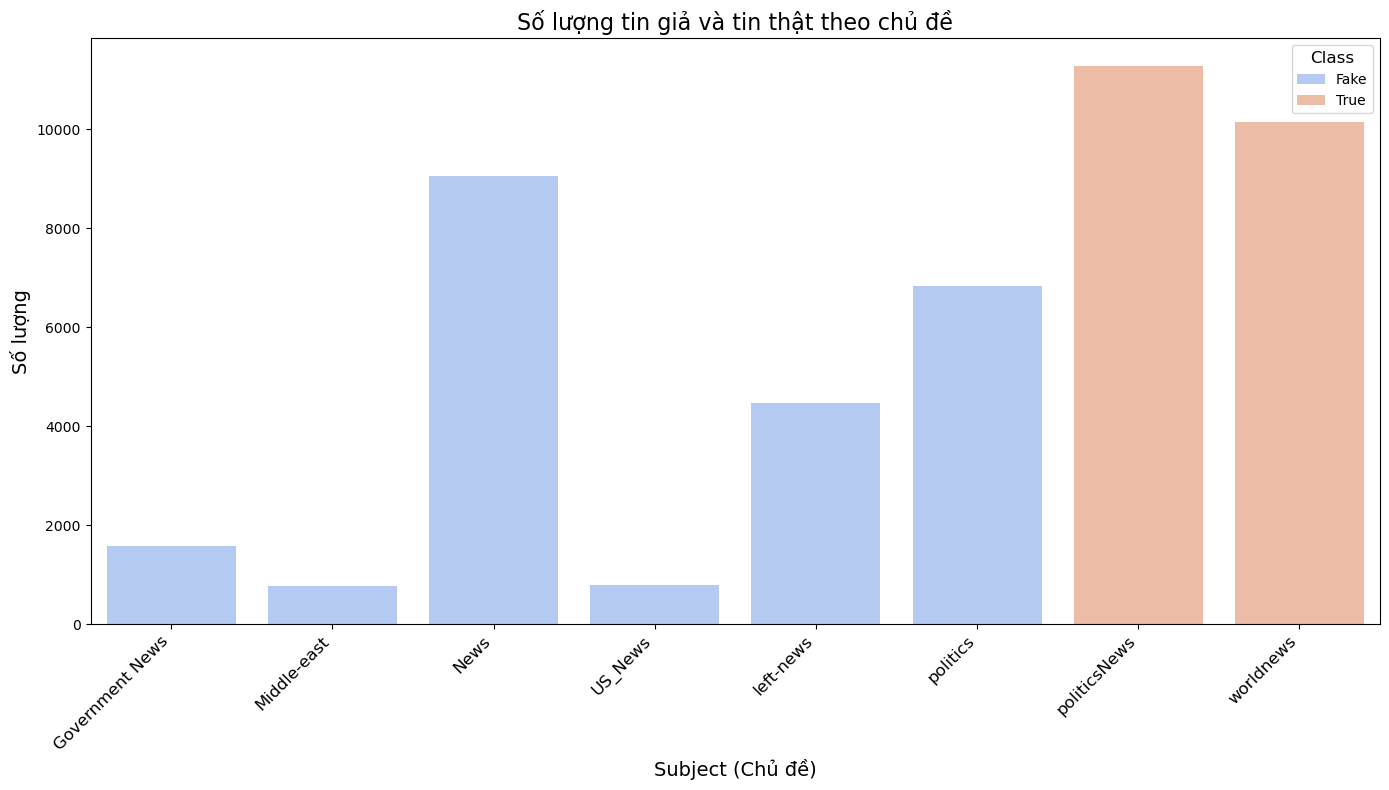

In [49]:
plt.figure(figsize=(14, 8))
sns.barplot(data=subject_label_counts, x='subject', y='count', hue='class', palette='coolwarm')

# Tùy chỉnh biểu đồ
plt.title('Số lượng tin giả và tin thật theo chủ đề', fontsize=16)
plt.xlabel('Subject (Chủ đề)', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Class', title_fontsize=12, fontsize=10)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

In [51]:
data=data_merge.drop(['title','date','subject'], axis = 1)


In [53]:
data.sample(10)

,text,class
14670,"Hey, everything is fair game in this war to wi...",0
3601,"AUSTIN, Texas (Reuters) - The Texas House of R...",1
6016,Students at a North Carolina high school have ...,0
6984,WASHINGTON (Reuters) - President-elect Donald ...,1
10188,WASHINGTON (Reuters) - The Supreme Court on We...,1
21262,SEOUL (Reuters) - North Korean leader Kim Jong...,1
13501,I certainly hope Hillary picks Liz Warren for ...,0
21308,"KABUL (Reuters) - As many as 13 people, includ...",1
13549,YANGON (Reuters) - The Vatican on Wednesday de...,1
16479,BERLIN (Reuters) - The three parties exploring...,1


In [55]:
# In ra 1 dong dữu liệu của cột 'text'
print(data_merge['text'].iloc[3])


On Christmas day, Donald Trump announced that he would  be back to work  the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Barack Obama for playing golf and now Trump is on track to outpace the number of golf games his predecessor played.Updated my tracker of Trump s appearances at Trump properties.71 rounds of golf including today s. At this pace, he ll pass Obama s first-term total by July 24 next year. https://t.co/Fg7VacxRtJ pic.twitter.com/5gEMcjQTbH  Philip Bump (@pbump) December 29, 2017 That makes what a Washington Post reporter discovered on Trump s website really weird, but everything about this administration is bizarre AF. The coding contained a reference to Obama and golf:  Unlike Obama, we are working to fix the problem   and not on the golf course.  However, the coding wasn t done correctly.The website of Donald Trump, who has spent several days in a row at the golf course, is coded to serve up the fol

In [57]:
data.isnull().sum() 


text     0
class    0
dtype: int64

In [59]:
data = data.sample(frac = 1)


In [61]:
data.head()


,text,class
21028,SANTIAGO (Reuters) - Taxi drivers protesting t...,1
18994,AMSTERDAM (Reuters) - The International Crimin...,1
14219,This is awesome! No words just enjoy!,0
16911,PARIS (Reuters) - France on Friday called on I...,1
23098,Tune in to the Alternate Current Radio Network...,0


In [63]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [65]:
data.head()


,text,class
0,SANTIAGO (Reuters) - Taxi drivers protesting t...,1
1,AMSTERDAM (Reuters) - The International Crimin...,1
2,This is awesome! No words just enjoy!,0
3,PARIS (Reuters) - France on Friday called on I...,1
4,Tune in to the Alternate Current Radio Network...,0


In [78]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+',b'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\\w*\\d\\w*','',text)
    return text


<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
C:\Users\noname\AppData\Local\Temp\ipykernel_15888\2640322706.py:3: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]','',text)
C:\Users\noname\AppData\Local\Temp\ipykernel_15888\2640322706.py:5: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+','',text)


In [80]:
data['text'] = data['text'].apply(wordopt)


In [81]:
data.head(10)

,text,class
0,santiago reuters taxi drivers protesting t...,1
1,amsterdam reuters the international crimin...,1
2,this is awesome no words just enjoy,0
3,paris reuters france on friday called on i...,1
4,tune in to the alternate current radio network...,0
5,the democratic ranking member of the house int...,0
6,amid news of the russian scandal and congress ...,0
7,washington reuters the u s senate banking...,1
8,dakar reuters congolese security officials...,1
9,ivanka trump decided on tuesday evening to sen...,0


In [82]:
data.isnull().sum() 


text     0
class    0
dtype: int64

In [92]:
print(data['text'].iloc[6])


amid news of the russian scandal and congress  dystopian agenda  one fact keeps staring the american people right in the eye and republicans are choosing to ignore it  donald trump is mentally unfit to be president  there s even a movement beginning in congress that would invoke the  amendment to the constitution   to declare trump mentally unfit   and remove him from office  a video of trump wandering off of air force one and away from his limo won t help his cause in the video  trump is seen exiting the airplane  and despite the fact that the limo is adorned with american flags  and despite the fact that it s parked right at the bottom of the steps he just descended  trump wandered right by and his secret service agents had to wrangle the visibly confused  back here s the video twitter users are genuinely concerned that this man is in charge of the country i swear to god trump is sundowning  here he is  confused  wandering away from his limo  he had to be redirected   pic twitter com

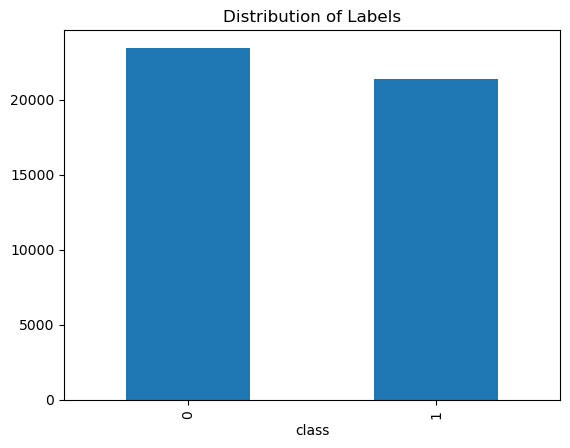

In [94]:
data['class'].value_counts().plot(kind='bar', title='Distribution of Labels')
plt.show()

In [95]:
from wordcloud import WordCloud


In [96]:
fake_text = " ".join(data[data['class'] == 0]['text'])
true_text = " ".join(data[data['class'] == 1]['text'])

fake_wordcloud = WordCloud(collocations=False, background_color='black').generate(fake_text)
true_wordcloud = WordCloud(collocations=False, background_color='white').generate(true_text)

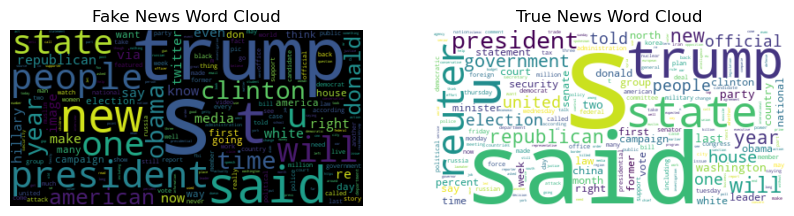

In [98]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title("Fake News Word Cloud")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(true_wordcloud, interpolation='bilinear')
plt.title("True News Word Cloud")
plt.axis("off")
plt.show()

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(data['text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df['class'] = data['class']

In [101]:
tfidf_mean = tfidf_df.groupby('class').mean().T
tfidf_mean.columns = ['Fake News', 'True News']

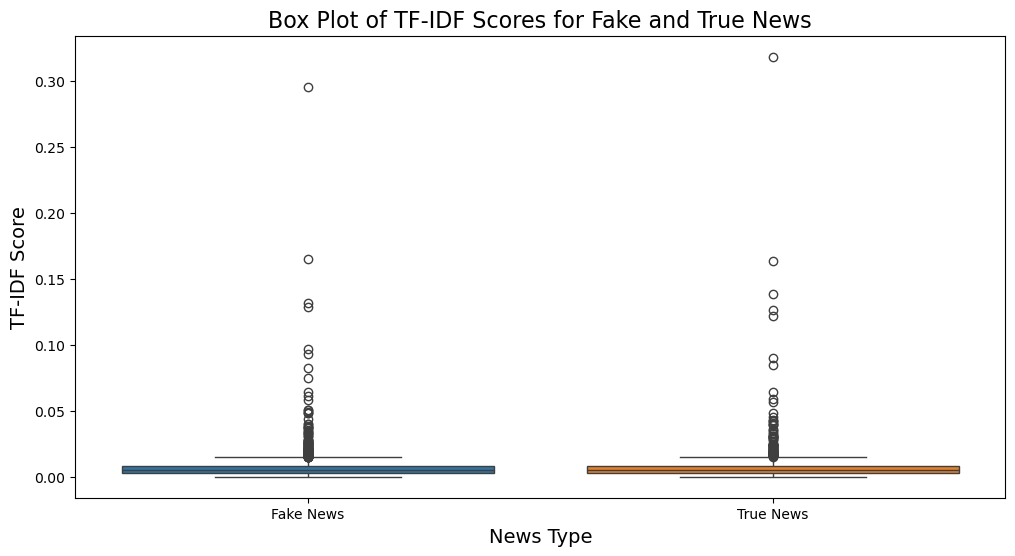

In [102]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=tfidf_mean)
plt.title('Box Plot of TF-IDF Scores for Fake and True News', fontsize=16)
plt.xlabel('News Type', fontsize=14)
plt.ylabel('TF-IDF Score', fontsize=14)
plt.show()

In [103]:
x = data['text']
y = data['class']

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)


In [112]:
vectorization = TfidfVectorizer(stop_words='english')
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [113]:
from sklearn.metrics import classification_report, confusion_matrix


In [114]:
from sklearn.linear_model import LogisticRegression


In [115]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [116]:
pred_lr = LR.predict(xv_test)


In [117]:
LR.score(xv_test, y_test)


0.9864527629233512

In [118]:
print("Logistic Regression:")
print (classification_report(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5898
           1       0.98      0.99      0.99      5322

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220

[[5809   89]
 [  63 5259]]


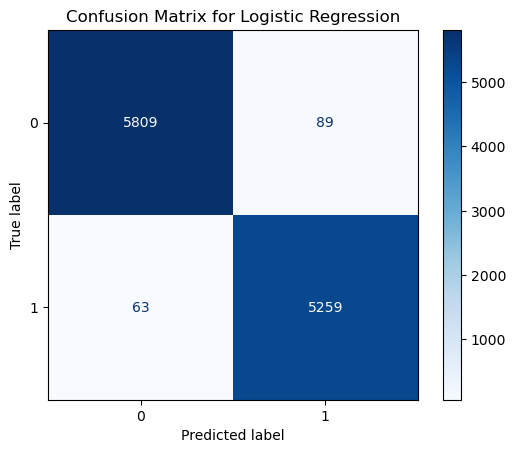

In [119]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred_lr)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [120]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [121]:
pred_dt = DT.predict(xv_test)


In [122]:
DT.score(xv_test, y_test)


0.9968805704099821

In [123]:
print("Decision Tree Classifier:")
print(classification_report(y_test, pred_dt))
print(confusion_matrix(y_test, pred_dt))

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5898
           1       1.00      1.00      1.00      5322

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220

[[5883   15]
 [  20 5302]]


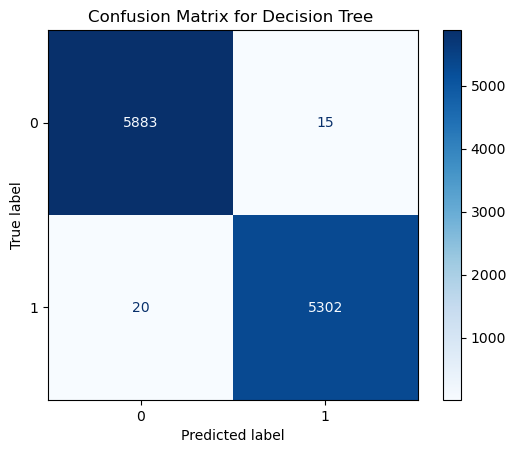

In [124]:
cm = confusion_matrix(y_test, pred_dt)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Decision Tree ")
plt.show()

In [125]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state = 0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [126]:
pred_gb = GB.predict(xv_test)


In [127]:
GB.score(xv_test, y_test)


0.9955436720142602

In [128]:
print("Gradient Boost Classifier:")
print(classification_report(y_test, pred_gb))
print(confusion_matrix(y_test, pred_gb))

Gradient Boost Classifier:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5898
           1       0.99      1.00      1.00      5322

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220

[[5861   37]
 [  13 5309]]


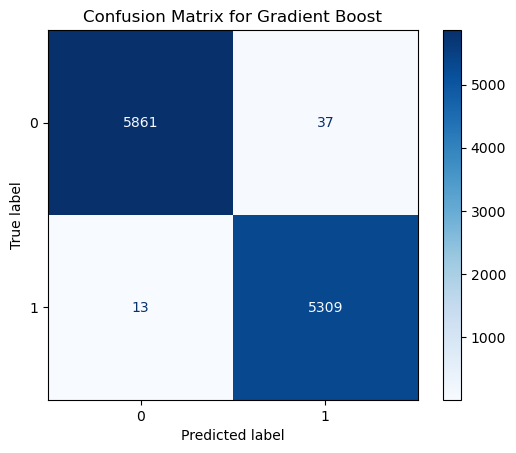

In [129]:
cm = confusion_matrix(y_test, pred_gb)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GB.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Gradient Boost")
plt.show()

In [130]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [131]:
pred_rf = RF.predict(xv_test)


In [132]:
RF.score(xv_test, y_test)


0.9893048128342246

In [133]:
print("Random Forest Classifier:")
print(classification_report(y_test, pred_rf))
print(confusion_matrix(y_test, pred_rf))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5898
           1       0.99      0.99      0.99      5322

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220

[[5834   64]
 [  56 5266]]


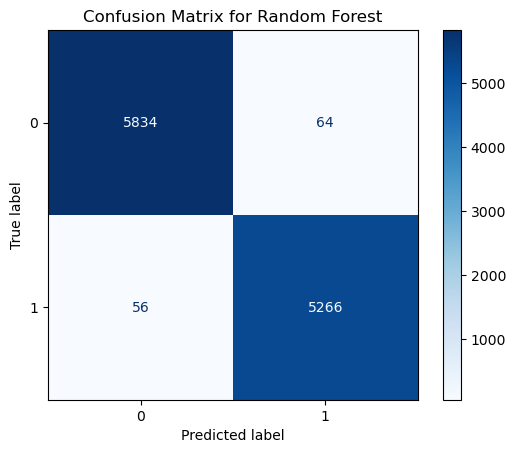

In [134]:
cm = confusion_matrix(y_test, pred_rf)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [135]:
from sklearn.metrics import accuracy_score

# Tính độ chính xác cho từng mô hình
accuracy_lr = accuracy_score(y_test, pred_lr)
accuracy_dt = accuracy_score(y_test, pred_dt)
accuracy_gb = accuracy_score(y_test, pred_gb)
accuracy_rf = accuracy_score(y_test, pred_rf)

# In kết quả
print("Accuracy of models:")
print(f"Logistic Regression: {round(accuracy_lr*100,2)}%")
print(f"Decision Tree: {round(accuracy_dt*100,2)}%")
print(f"Gradient Boost: {round(accuracy_gb*100,2)}%")
print(f"Random Forest: {round(accuracy_rf*100,2)}%")

Accuracy of models:
Logistic Regression: 98.65%
Decision Tree: 99.69%
Gradient Boost: 99.55%
Random Forest: 98.93%


In [136]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Tạo dictionary lưu các chỉ số cho từng thuật toán
comparison_metrics = {
    "Algorithm": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}


In [137]:
def evaluate_model(name, y_true, y_pred):
    comparison_metrics["Algorithm"].append(name)
    comparison_metrics["Accuracy"].append(accuracy_score(y_true, y_pred))
    comparison_metrics["Precision"].append(precision_score(y_true, y_pred, average="weighted"))
    comparison_metrics["Recall"].append(recall_score(y_true, y_pred, average="weighted"))
    comparison_metrics["F1-Score"].append(f1_score(y_true, y_pred, average="weighted"))


In [138]:
evaluate_model("Logistic Regression", y_test, pred_lr)      # Logistic Regression
evaluate_model("Decision Tree Classifier", y_test, pred_dt)  # Decision Tree
evaluate_model("Gradient Boost Classifier", y_test, pred_gb) # Gradient Boosting
evaluate_model("Random Forest Classifier", y_test, pred_rf)  # Random Forest

In [139]:
metrics_df = pd.DataFrame(comparison_metrics)

# In bảng
print("Comparison of Metrics for Different Algorithms:")
print(metrics_df)

Comparison of Metrics for Different Algorithms:
                   Algorithm  Accuracy  Precision    Recall  F1-Score
0        Logistic Regression  0.986453   0.986466  0.986453  0.986454
1   Decision Tree Classifier  0.996881   0.996881  0.996881  0.996880
2  Gradient Boost Classifier  0.995544   0.995554  0.995544  0.995544
3   Random Forest Classifier  0.989305   0.989307  0.989305  0.989305


In [140]:
import random
import pandas as pd

Decision Tree Rules:
|--- reuters <= 0.01
|   |--- kosrae <= 0.01
|   |   |--- catalonia <= 0.14
|   |   |   |--- ifr <= 0.13
|   |   |   |   |--- truncated branch of depth 119
|   |   |   |--- ifr >  0.13
|   |   |   |   |--- class: 1
|   |   |--- catalonia >  0.14
|   |   |   |--- class: 1
|   |--- kosrae >  0.01
|   |   |--- class: 1
|--- reuters >  0.01
|   |--- getty <= 0.01
|   |   |--- filessupport <= 0.01
|   |   |   |--- wire <= 0.06
|   |   |   |   |--- truncated branch of depth 71
|   |   |   |--- wire >  0.06
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- filessupport >  0.01
|   |   |   |--- class: 0
|   |--- getty >  0.01
|   |   |--- atrium <= 0.05
|   |   |   |--- class: 0
|   |   |--- atrium >  0.05
|   |   |   |--- class: 1



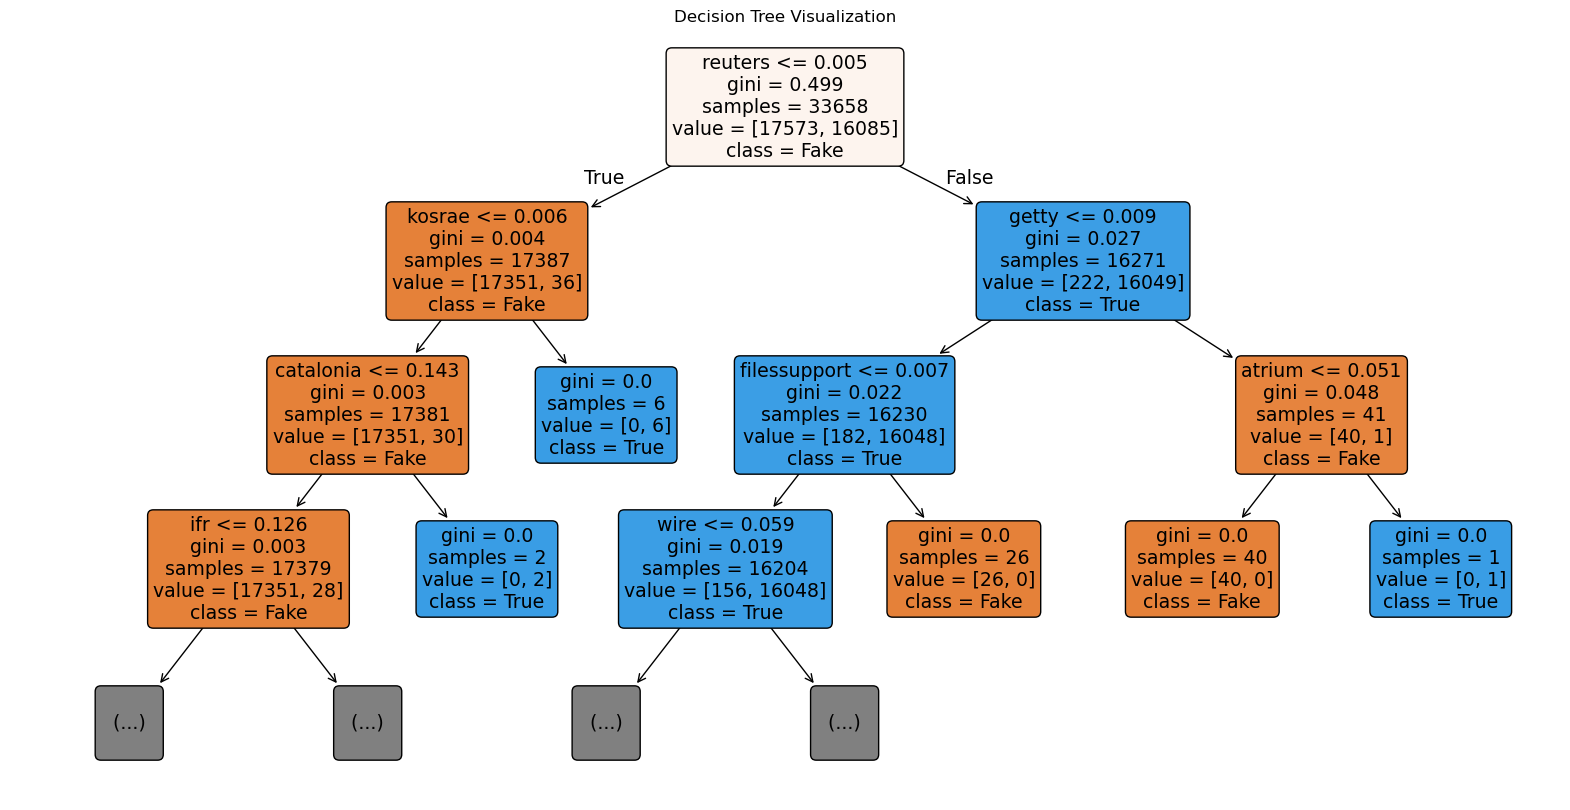

In [141]:
from sklearn.tree import export_text, plot_tree


tree_rules = export_text(DT, feature_names=vectorization.get_feature_names_out(), max_depth=3)
print("Decision Tree Rules:")
print(tree_rules)

# Vẽ cây quyết định
plt.figure(figsize=(20, 10))
plot_tree(DT, 
          feature_names=vectorization.get_feature_names_out(), 
          class_names=["Fake", "True"], 
          filled=True, 
          rounded=True, 
          max_depth=3)
plt.title("Decision Tree Visualization")
plt.show()

In [142]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_DT = DT.predict(new_xv_test)
    return print("\n\nDT Predicition: {} ".format(output_lable(pred_DT[0])))

In [143]:
news = str(input()) 
manual_testing(news)

 The following statementsÂ were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own.Â Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - â€œOn 1/20 - the day Trump was inaugurated - an estimated 35,000 ISIS fighters held approx 17,500 square miles of territory in both Iraq and Syria. As of 12/21, the U.S. military estimates the remaining 1,000 or so fighters occupy roughly 1,900 square miles...â€ via @jamiejmcintyre  [1749 EST] - Just left West Palm Beach Fire & Rescue #2. Met with great men and women as representatives of those who do so much for all of us. Firefighters, paramedics, first responders - what amazing people they are! [1811 EST] - â€œOn 1/20 - the day Trump was inaugurated - an estimated 35,000 ISIS fighters held approx 17,500 square miles of territory in both Iraq and Syria. As of 12/21, the U.S. military est the remaining 1,000 or so fighters occup



DT Predicition: Not A Fake News 


In [177]:
news = str(input()) 
manual_testing(news)


 Abigail Disney is an heiress with brass ovaries who will profit from the GOP tax scam bill but isn t into f-cking poor people over. Ms. Disney penned an op-ed for USA Today in which she rips the GOP a new one because she has  always been cognizant of income and wealth inequality.  In other words, she is not Donald Trump, Paul Ryan or Bob Corker. Or Mitch McConnell. She is Abigail Disney, dammit. Since the election of Ronald Reagan, the gap between rich and poor has grown dramatically and  trickle down  economics has turned out to cause more of a trickle up,  she writes.  But nothing has brought the problem of inequality into sharper focus for me than the current proposals by Republicans to overhaul the tax system. Disney says that this proposal will be burdensome to the middle class while decreasing  the responsibility of the wealthy to contribute to the common good. And then she dropped a truth bomb. (We like truth bombs.)Republicans insist this plan will cut taxes for the middle cla



DT Predicition: Fake News 
